In [14]:
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np

In [2]:
driver = 'mysql+pymysql:'
user = 'root'
password = '17028854'
ip = '35.195.111.11'
database = 'Avocalypse'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [3]:
ig_data = pd.read_sql('insta_posts_notnull',con=engine)

In [21]:
ig_data = ig_data.drop(columns=['index'])

Time range of the #avocado posts

In [17]:
ig_data[ig_data['tags'] == 'avocado']['date'].max()-ig_data[ig_data['tags'] == 'avocado']['date'].min()

Timedelta('620 days 22:57:02')

We need to consider that the scrapping left a 75% of the data out. We have a small sample but we can consider that we have a RANDOM sample from the posts of the last 620 days

In [38]:
ig_data['counter']=1

In [40]:
ig_data.head()

,tags,postid,date,likes,counter
0,avocado,Bvt2CQcnYB2,2019-04-01 14:29:46,0.0,1
1,avocado,Bvt2ANMlhM9,2019-04-01 14:29:29,2.0,1
2,avocado,Bvt18Zfn2Mb,2019-04-01 14:29:08,3.0,1
3,avocado,Bvt18PHh1Ch,2019-04-01 14:28:56,4.0,1
4,avocado,Bvt16cyHNCs,2019-04-01 14:28:42,22.0,1


In [42]:
ig_data_day_grouped = ig_data.resample('D', on='date').sum().reset_index()

In [45]:
sb.set(rc={'figure.figsize':(15,8)})

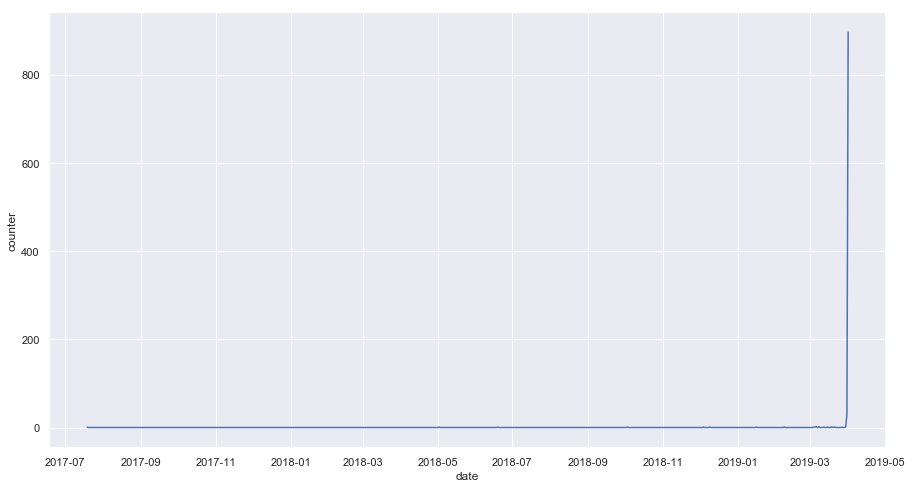

In [46]:
sns.lineplot(data=ig_data_day_grouped,x='date',y='counter')

In [52]:
ig_data_day_grouped.tail(5)

,date,likes,counter
617,2019-03-28,0.000,0
618,2019-03-29,0.000,0
619,2019-03-30,88.000,1
620,2019-03-31,946.433,30
621,2019-04-01,9104.720,896


This shows that the scrapping did not work very well for old posts

In [51]:
ig_data_oneday = ig_data[ig_data['date']>np.datetime64('2019-03-31')]

In [71]:
hourly_posting = ig_data_oneday.groupby(by=[ig_data_oneday.date.map(lambda x : (x.hour))])
hourly_posting = hourly_posting.count()

In [76]:
hourly_posting

,tags,postid,date,likes,counter
date,,,,,
1,7,7,7,7,7
2,17,17,17,17,17
3,9,9,9,9,9
4,16,16,16,16,16
7,3,3,3,3,3
9,9,9,9,9,9
10,8,8,8,8,8
11,14,14,14,14,14
12,9,9,9,9,9


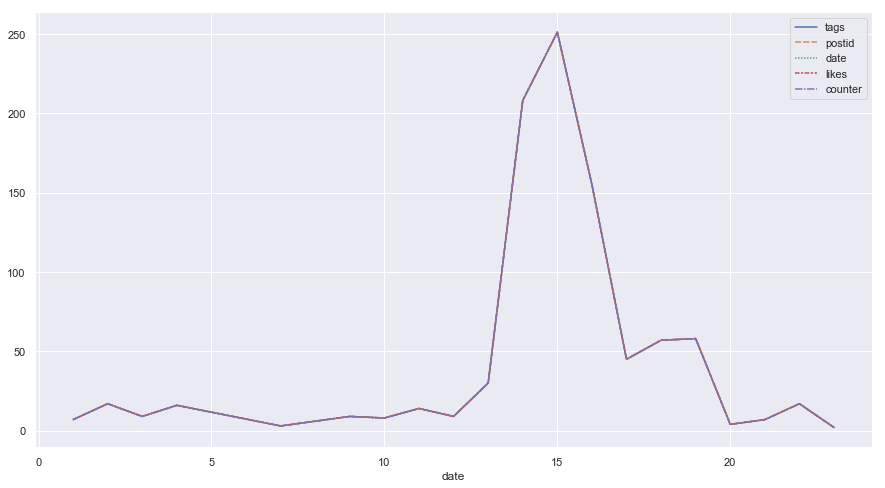

In [79]:
sns.lineplot(data=hourly_posting)